---

_You are currently looking at **version 1.0** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-data-analysis/resources/0dhYG) course resource._

---

# Merging Dataframes


In [222]:
import pandas as pd

df = pd.DataFrame([{'Name': 'Chris', 'Item Purchased': 'Sponge', 'Cost': 22.50},
                   {'Name': 'Kevyn', 'Item Purchased': 'Kitty Litter', 'Cost': 2.50},
                   {'Name': 'Filip', 'Item Purchased': 'Spoon', 'Cost': 5.00}],
                  index=['Store 1', 'Store 1', 'Store 2'])
df

,Name,Item Purchased,Cost
Store 1,Chris,Sponge,22.5
Store 1,Kevyn,Kitty Litter,2.5
Store 2,Filip,Spoon,5.0


Añadiendo nueva columna manualmente: Se añade el número de datos exacto.

In [223]:
df['Date'] = ['December 1', 'January 1', 'mid-May']
df

,Name,Item Purchased,Cost,Date
Store 1,Chris,Sponge,22.5,December 1
Store 1,Kevyn,Kitty Litter,2.5,January 1
Store 2,Filip,Spoon,5.0,mid-May


Añadiendo nueva columna binaria: Se da un valor y se aplica a toda la columna

In [224]:
df['Delivered'] = True
df

,Name,Item Purchased,Cost,Date,Delivered
Store 1,Chris,Sponge,22.5,December 1,True
Store 1,Kevyn,Kitty Litter,2.5,January 1,True
Store 2,Filip,Spoon,5.0,mid-May,True


Se añade una nueva columna de la cual sólo se tienen menos valores de los necesarios: se deben incluir `None` (de lo contrario marcará error)

In [225]:
df['Feedback'] = ['Positive', None,  'Negative']
df

,Name,Item Purchased,Cost,Date,Delivered,Feedback
Store 1,Chris,Sponge,22.5,December 1,True,Positive
Store 1,Kevyn,Kitty Litter,2.5,January 1,True,None
Store 2,Filip,Spoon,5.0,mid-May,True,Negative


Se resetea index, se añade nueva columna como Serie en forma de diccionario (las keys son los valores de los índices correspondientes)

In [226]:
adf = df.reset_index()
adf['Date'] = pd.Series({0: 'December 1', 2: 'mid-May'})
adf

,index,Name,Item Purchased,Cost,Date,Delivered,Feedback
0,Store 1,Chris,Sponge,22.5,December 1,True,Positive
1,Store 1,Kevyn,Kitty Litter,2.5,NaN,True,None
2,Store 2,Filip,Spoon,5.0,mid-May,True,Negative


### Merging

In [227]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR'},
                         {'Name': 'Sally', 'Role': 'Course liasion'},
                         {'Name': 'James', 'Role': 'Grader'}])
staff_df = staff_df.set_index('Name')
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business'},
                           {'Name': 'Mike', 'School': 'Law'},
                           {'Name': 'Sally', 'School': 'Engineering'}])
student_df = student_df.set_index('Name')
staff_df.head()

,Role
Name,
Kelly,Director of HR
Sally,Course liasion
James,Grader


In [228]:
student_df.head()

,School
Name,
James,Business
Mike,Law
Sally,Engineering


En estos ejemplos de DF hay personas que tienen tanto un rol en el staff pero que también son estudiantes.

A continuación se muestran diversos métodos para combinar los dataframes:

**Unión** o 'outer': Al final quedarán todos los indices (que en este caso fueron seteados a ser el nombre).

In [229]:
pd.merge(staff_df, student_df, how='outer', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Kelly,Director of HR,NaN
Mike,NaN,Law
Sally,Course liasion,Engineering


**Intersección** o 'inner': Sólo se quedan personas que tengan datos en los dos dataframes.

In [230]:
pd.merge(staff_df, student_df, how='inner', left_index=True, right_index=True)

,Role,School
Name,,
Sally,Course liasion,Engineering
James,Grader,Business


**Por derecha o izquierda**, el especificado (es decir el que esté en how='left' o 'right') se mantiene, el otro se adapta.

In [231]:
pd.merge(staff_df, student_df, how='left', left_index=True, right_index=True)

,Role,School
Name,,
Kelly,Director of HR,NaN
Sally,Course liasion,Engineering
James,Grader,Business


In [232]:
pd.merge(staff_df, student_df, how='right', left_index=True, right_index=True)

,Role,School
Name,,
James,Grader,Business
Mike,NaN,Law
Sally,Course liasion,Engineering


Mezcla con índices distintos.
Cuando no coinciden en los índices (en este caso se resetearon) hay que indicar sobre que columna se hara la combinación.

In [233]:
staff_df = staff_df.reset_index()
student_df = student_df.reset_index()
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,School
0,Kelly,Director of HR,NaN
1,Sally,Course liasion,Engineering
2,James,Grader,Business


Mezcla con columnas "repetidas".

Un ejemplo de cuando dos dataframes se quieren combinar sobre una columna (Name) pero los DF tienen columnas que tienen el mismo nombre. Pandas añade el sufijo _x y _y

In [234]:
staff_df = pd.DataFrame([{'Name': 'Kelly', 'Role': 'Director of HR', 'Location': 'State Street'},
                         {'Name': 'Sally', 'Role': 'Course liasion', 'Location': 'Washington Avenue'},
                         {'Name': 'James', 'Role': 'Grader', 'Location': 'Washington Avenue'}])
student_df = pd.DataFrame([{'Name': 'James', 'School': 'Business', 'Location': '1024 Billiard Avenue'},
                           {'Name': 'Mike', 'School': 'Law', 'Location': 'Fraternity House #22'},
                           {'Name': 'Sally', 'School': 'Engineering', 'Location': '512 Wilson Crescent'}])
pd.merge(staff_df, student_df, how='left', left_on='Name', right_on='Name')

,Name,Role,Location_x,School,Location_y
0,Kelly,Director of HR,State Street,NaN,NaN
1,Sally,Course liasion,Washington Avenue,Engineering,512 Wilson Crescent
2,James,Grader,Washington Avenue,Business,1024 Billiard Avenue


Combinando sobre varios índices. 
Los parametros `left_on` y `right_on` se ponen en forma de lista

In [235]:
staff_df = pd.DataFrame([{'First Name': 'Kelly', 'Last Name': 'Desjardins', 'Role': 'Director of HR'},
                         {'First Name': 'Sally', 'Last Name': 'Brooks', 'Role': 'Course liasion'},
                         {'First Name': 'James', 'Last Name': 'Wilde', 'Role': 'Grader'}])
student_df = pd.DataFrame([{'First Name': 'James', 'Last Name': 'Hammond', 'School': 'Business'},
                           {'First Name': 'Mike', 'Last Name': 'Smith', 'School': 'Law'},
                           {'First Name': 'Sally', 'Last Name': 'Brooks', 'School': 'Engineering'}])
staff_df

,First Name,Last Name,Role
0,Kelly,Desjardins,Director of HR
1,Sally,Brooks,Course liasion
2,James,Wilde,Grader


In [236]:
pd.merge(staff_df, student_df, how='inner', left_on=['First Name','Last Name'], right_on=['First Name','Last Name'])

,First Name,Last Name,Role,School
0,Sally,Brooks,Course liasion,Engineering


# Idiomatic Pandas: Making Code Pandorable

In [237]:
import pandas as pd
df = pd.read_csv('data/census.csv')
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


Una forma "*pandorable*" de codificar es usando varias líneas, en ese caso hay que agregar el paréntesis al inicio y al final para que no marque error.

Este codigo

In [238]:
# Cómo no queremos que se guarde no se agrega df = ... 
(df.where(df['SUMLEV']==50) # Deja igual a las filas que cumplen la condición (True) y a las que no les asigna NaN
     .dropna()              # Elimna las que valen NaN (es decir, que no cumplen la condición dad)
     .set_index(['STNAME','CTYNAME'])  # Con las que sobran establece un multi-índice Nombre de Estado y County
     .rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'}) ) # Renombra columnas

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County           54571.0              54571.0   
        Baldwin County          182265.0             182265.0   
        Barbour County           27457.0              27457.0   
        Bibb County              22915.0              22919.0   
        Blount County            57322.0              57322.0   
...                                  ...                  ...   
Wyoming Sweetwater County        43806.0              43806.0   
        Teton County             21294.0              21294.0   
        Uinta County             21118.0              21118.0   
        Washakie County           8533.0               8533.0   
        Weston County             7208.0               7208.0   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54660.0          55253.0          55175.0   
        Baldwin County            183193.0         186659.0         190396.0   
        Barbour County             27341.0          27226.0          27159.0   
        Bibb County                22861.0          22733.0          22642.0   
        Blount County              57373.0          57711.0          57776.0   
...                                    ...              ...              ...   
Wyoming Sweetwater County          43593.0          44041.0          45104.0   
        Teton County               21297.0          21482.0          21697.0   
        Uinta County               21102.0          20912.0          20989.0   
        Washakie County             8545.0           8469.0           8443.0   
        Weston County               7181.0           7114.0           7065.0   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [239]:
# Mi versión:
# Cómo no queremos que se guarde no se agrega df = ... 
(df[df.SUMLEV == 50]
   .set_index(['STNAME', 'CTYNAME'])
   .rename(columns = {'ESTIMATEBASE2010': 'Estimated Base 2010'}))

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County             54571              54571            54660   
        Baldwin County            182265             182265           183193   
        Barbour County             27457              27457            27341   
        Bibb County                22915              22919            22861   
        Blount County              57322              57322            57373   
...                                  ...                ...              ...   
Wyoming Sweetwater County          43806              43806            43593   
        Teton County               21294              21294            21297   
        Uinta County               21118              21118            21102   
        Washakie County             8533               8533             8545   
        Weston County               7208               7208             7181   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County               55253            55175  ...   
        Baldwin County              186659           190396  ...   
        Barbour County               27226            27159  ...   
        Bibb County                  22733            22642  ...   
        Blount County                57711            57776  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County            44041            45104  ...   
        Teton County                 21482            21697  ...   
        Uinta County                 20912            20989  ...   
        Washakie County               8469             8443  ...   
        Weston County                 7114             7065  ...   

                           RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME                                                 
Alabama Autauga County             7.242091         -2.915927   
        Baldwin County            14.832960         17.647293   
        Barbour County            -4.728132         -2.500690   
        Bibb County               -5.527043         -5.068871   
        Blount County              1.807375         -1.177622   
...                                     ...               ...   
Wyoming Sweetwater County          1.072643         16.243199   
        Teton County              -1.589565          0.972695   
        Uinta County             -17.755986         -4.916350   
        Washakie County          -11.637475         -0.827815   
        Weston County            -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County

In [240]:
df = df[df['SUMLEV']==50]
df.set_index(['STNAME','CTYNAME'], inplace=True)
df.rename(columns={'ESTIMATESBASE2010': 'Estimates Base 2010'})

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County         50       3         6      1       1   
        Baldwin County         50       3         6      1       3   
        Barbour County         50       3         6      1       5   
        Bibb County            50       3         6      1       7   
        Blount County          50       3         6      1       9   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County      50       4         8     56      37   
        Teton County           50       4         8     56      39   
        Uinta County           50       4         8     56      41   
        Washakie County        50       4         8     56      43   
        Weston County          50       4         8     56      45   

                           CENSUS2010POP  Estimates Base 2010  \
STNAME  CTYNAME                                                 
Alabama Autauga County             54571                54571   
        Baldwin County            182265               182265   
        Barbour County             27457                27457   
        Bibb County                22915                22919   
        Blount County              57322                57322   
...                                  ...                  ...   
Wyoming Sweetwater County          43806                43806   
        Teton County               21294                21294   
        Uinta County               21118                21118   
        Washakie County             8533                 8533   
        Weston County               7208                 7208   

                           POPESTIMATE2010  POPESTIMATE2011  POPESTIMATE2012  \
STNAME  CTYNAME                                                                
Alabama Autauga County               54660            55253            55175   
        Baldwin County              183193           186659           190396   
        Barbour County               27341            27226            27159   
        Bibb County                  22861            22733            22642   
        Blount County                57373            57711            57776   
...                                    ...              ...              ...   
Wyoming Sweetwater County            43593            44041            45104   
        Teton County                 21297            21482            21697   
        Uinta County                 21102            20912            20989   
        Washakie County               8545             8469             8443   
        Weston County                 7181             7114             7065   

                           ...  RDOMESTICMIG2011  RDOMESTICMIG2012  \
STNAME  CTYNAME            ...                                       
Alabama Autauga County     ...          7.242091         -2.915927   
        Baldwin County     ...         14.832960         17.647293   
        Barbour County     ...         -4.728132         -2.500690   
        Bibb County        ...         -5.527043         -5.068871   
        Blount County      ...          1.807375         -1.177622   
...                        ...               ...               ...   
Wyoming Sweetwater County  ...          1.072643         16.243199   
        Teton County       ...         -1.589565          0.972695   
        Uinta County       ...        -17.755986         -4.916350   
        Washakie County    ...        -11.637475         -0.827815   
        Weston County      ...        -11.752361         -8.040059   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904

In [241]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    return pd.Series({'min': np.min(data), 'max': np.max(data)})

In [242]:
df.apply(min_max, axis=1)

min       max
STNAME  CTYNAME                              
Alabama Autauga County      54660.0   55347.0
        Baldwin County     183193.0  203709.0
        Barbour County      26489.0   27341.0
        Bibb County         22512.0   22861.0
        Blount County       57373.0   57776.0
...                             ...       ...
Wyoming Sweetwater County   43593.0   45162.0
        Teton County        21297.0   23125.0
        Uinta County        20822.0   21102.0
        Washakie County      8316.0    8545.0
        Weston County        7065.0    7234.0

[3142 rows x 2 columns]

In [243]:
import numpy as np
def min_max(row):
    data = row[['POPESTIMATE2010',
                'POPESTIMATE2011',
                'POPESTIMATE2012',
                'POPESTIMATE2013',
                'POPESTIMATE2014',
                'POPESTIMATE2015']]
    row['max'] = np.max(data)
    row['min'] = np.min(data)
    return row
df.apply(min_max, axis=1)

SUMLEV  REGION  DIVISION  STATE  COUNTY  \
STNAME  CTYNAME                                                      
Alabama Autauga County       50.0     3.0       6.0    1.0     1.0   
        Baldwin County       50.0     3.0       6.0    1.0     3.0   
        Barbour County       50.0     3.0       6.0    1.0     5.0   
        Bibb County          50.0     3.0       6.0    1.0     7.0   
        Blount County        50.0     3.0       6.0    1.0     9.0   
...                           ...     ...       ...    ...     ...   
Wyoming Sweetwater County    50.0     4.0       8.0   56.0    37.0   
        Teton County         50.0     4.0       8.0   56.0    39.0   
        Uinta County         50.0     4.0       8.0   56.0    41.0   
        Washakie County      50.0     4.0       8.0   56.0    43.0   
        Weston County        50.0     4.0       8.0   56.0    45.0   

                           CENSUS2010POP  ESTIMATESBASE2010  POPESTIMATE2010  \
STNAME  CTYNAME                                                                
Alabama Autauga County           54571.0            54571.0          54660.0   
        Baldwin County          182265.0           182265.0         183193.0   
        Barbour County           27457.0            27457.0          27341.0   
        Bibb County              22915.0            22919.0          22861.0   
        Blount County            57322.0            57322.0          57373.0   
...                                  ...                ...              ...   
Wyoming Sweetwater County        43806.0            43806.0          43593.0   
        Teton County             21294.0            21294.0          21297.0   
        Uinta County             21118.0            21118.0          21102.0   
        Washakie County           8533.0             8533.0           8545.0   
        Weston County             7208.0             7208.0           7181.0   

                           POPESTIMATE2011  POPESTIMATE2012  ...  \
STNAME  CTYNAME                                              ...   
Alabama Autauga County             55253.0          55175.0  ...   
        Baldwin County            186659.0         190396.0  ...   
        Barbour County             27226.0          27159.0  ...   
        Bibb County                22733.0          22642.0  ...   
        Blount County              57711.0          57776.0  ...   
...                                    ...              ...  ...   
Wyoming Sweetwater County          44041.0          45104.0  ...   
        Teton County               21482.0          21697.0  ...   
        Uinta County               20912.0          20989.0  ...   
        Washakie County             8469.0           8443.0  ...   
        Weston County               7114.0           7065.0  ...   

                           RDOMESTICMIG2013  RDOMESTICMIG2014  \
STNAME  CTYNAME                                                 
Alabama Autauga County            -3.012349          2.265971   
        Baldwin County            21.845705         19.243287   
        Barbour County            -7.056824         -3.904217   
        Bibb County               -6.201001         -0.177537   
        Blount County             -1.748766         -2.062535   
...                                     ...               ...   
Wyoming Sweetwater County         -5.339774        -14.252889   
        Teton County              19.525929         14.143021   
        Uinta County              -6.902954        -14.215862   
        Washakie County           -2.013502        -17.781491   
        Weston County             12.372583          1.533635   

                           RDOMESTICMIG2015  RNETMIG2011  RNETMIG2012  \
STNAME  CTYNAME                                                         
Alabama Autauga County            -2.530799     7.606016    -2.626146   
        Baldwin County            17.197872    15.844176    18.559627   
        Barbour County           -10.543299    -4.87

In [244]:
rows = ['POPESTIMATE2010',
        'POPESTIMATE2011',
        'POPESTIMATE2012',
        'POPESTIMATE2013',
        'POPESTIMATE2014',
        'POPESTIMATE2015']
df.apply(lambda x: np.max(x[rows]), axis=1)

STNAME   CTYNAME          
Alabama  Autauga County        55347.0
         Baldwin County       203709.0
         Barbour County        27341.0
         Bibb County           22861.0
         Blount County         57776.0
                                ...   
Wyoming  Sweetwater County     45162.0
         Teton County          23125.0
         Uinta County          21102.0
         Washakie County        8545.0
         Weston County          7234.0
Length: 3142, dtype: float64

# Group by

In [245]:
import pandas as pd
import numpy as np
df = pd.read_csv('data/census.csv')
df = df[df['SUMLEV']==50]
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


Prueba para encontrar la población promedio de los counties en cada estado. 

In [246]:
# %%timeit -n 2
# for state in df['STNAME'].unique():
#     avg = np.average(df.where(df['STNAME']==state).dropna()['CENSUS2010POP'])
#     print('Counties in state ' + state + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population o

Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population of 158855.9411764706
Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolin

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an 

Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average populatio

Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average popu

Usando **groupby**

In [247]:
# %%timeit -n 5
# for group, frame in df.groupby('STNAME'):
#     avg = np.average(frame['CENSUS2010POP'])
#     print('Counties in state ' + group + ' have an average population of ' + str(avg))

Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average populat

Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virg

Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population of 467687.78571428574
Counties in state Michigan have an average population of 119080.0
Counties in state Minnesota have an average population of 60964.65517241379
Counties in state Mississippi have an average population of 36186.54878048781
Counties in state Missouri have an average population of 52077.62608695652
Counties in state Montana have an average population of 17668.125
Counties in state Nebraska have an average population of 19638.075268817203
Counties in state Nevada have an average population 

Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska hav

Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average populat

Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisco

Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an average population of 446762.125
Counties in state Delaware have an average population of 299311.3333333333
Counties in state District of Columbia

Counties in state New Hampshire have an average population of 131647.0
Counties in state New Jersey have an average population of 418661.61904761905
Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in 

Counties in state District of Columbia have an average population of 601723.0
Counties in state Florida have an average population of 280616.5671641791
Counties in state Georgia have an average population of 60928.63522012578
Counties in state Hawaii have an average population of 272060.2
Counties in state Idaho have an average population of 35626.86363636364
Counties in state Illinois have an average population of 125790.50980392157
Counties in state Indiana have an average population of 70476.10869565218
Counties in state Iowa have an average population of 30771.262626262625
Counties in state Kansas have an average population of 27172.55238095238
Counties in state Kentucky have an average population of 36161.39166666667
Counties in state Louisiana have an average population of 70833.9375
Counties in state Maine have an average population of 83022.5625
Counties in state Maryland have an average population of 240564.66666666666
Counties in state Massachusetts have an average population

Counties in state New Mexico have an average population of 62399.36363636364
Counties in state New York have an average population of 312550.03225806454
Counties in state North Carolina have an average population of 95354.83
Counties in state North Dakota have an average population of 12690.396226415094
Counties in state Ohio have an average population of 131096.63636363635
Counties in state Oklahoma have an average population of 48718.844155844155
Counties in state Oregon have an average population of 106418.72222222222
Counties in state Pennsylvania have an average population of 189587.74626865672
Counties in state Rhode Island have an average population of 210513.4
Counties in state South Carolina have an average population of 100551.39130434782
Counties in state South Dakota have an average population of 12336.060606060606
Counties in state Tennessee have an average population of 66801.1052631579
Counties in state Texas have an average population of 98998.27165354331
Counties in st

Counties in state Utah have an average population of 95306.37931034483
Counties in state Vermont have an average population of 44695.78571428572
Counties in state Virginia have an average population of 60111.29323308271
Counties in state Washington have an average population of 172424.10256410256
Counties in state West Virginia have an average population of 33690.8
Counties in state Wisconsin have an average population of 78985.91666666667
Counties in state Wyoming have an average population of 24505.478260869564
Counties in state Alabama have an average population of 71339.34328358209
Counties in state Alaska have an average population of 24490.724137931036
Counties in state Arizona have an average population of 426134.4666666667
Counties in state Arkansas have an average population of 38878.90666666667
Counties in state California have an average population of 642309.5862068966
Counties in state Colorado have an average population of 78581.1875
Counties in state Connecticut have an a

In [248]:
df.head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
5,50,3,6,1,9,Alabama,Blount County,57322,57322,57373,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


### Función avanzada de Groupby:

Cuando el argumento es una función se aplica la función a cada uno de los índices del dataframe, a partir del conjunto de resultados obtenido s de aplicar la función se agrupa el Dataframe.

In [249]:
df = pd.read_csv('data/census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME')

def fun(item): #Item en este caso sería el índice...
    if item[0]<'M':
        return 0
    if item[0]<'Q':
        return 1
    return 2

#Argumento puede ser mapping, function, label or list of labels...
for group, frame in df.groupby(fun): # En este caso es función.
    print('There are ' + str(len(frame)) + ' records in group ' + str(group) + ' for processing.')


There are 1177 records in group 0 for processing.
There are 1134 records in group 1 for processing.
There are 831 records in group 2 for processing.


In [250]:
df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wyoming,50,4,8,56,37,Sweetwater County,43806,43806,43593,44041,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
Wyoming,50,4,8,56,39,Teton County,21294,21294,21297,21482,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
Wyoming,50,4,8,56,41,Uinta County,21118,21118,21102,20912,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351


### Función .agg()

In [251]:
df = pd.read_csv('data/census.csv')
df = df[df['SUMLEV']==50]

In [252]:
df.groupby('STNAME').agg(np.average).head() # Se calcula el promedio de todas las columnas...

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,67.000000,71339.343284,71345.179104,71420.313433,71658.328358,71881.925373,...,-3.395735,-3.043109,-2.186529,-1.715909,-1.958259,-2.781050,-2.339462,-1.506142,-0.944449,-1.155698
Alaska,50,4,9,2,149.655172,24490.724138,24491.344828,24621.413793,24921.379310,25214.758621,...,-1.153129,-5.261918,-9.277180,-18.013402,-13.090652,2.175991,-1.651751,-5.795667,-14.182244,-9.125865
Arizona,50,4,8,4,13.866667,426134.466667,426153.800000,427213.866667,431248.800000,436884.133333,...,0.422680,-1.901080,-2.447228,2.016780,-0.523498,1.670682,-0.513930,-1.044427,3.601728,1.128518
Arkansas,50,3,7,5,75.000000,38878.906667,38879.440000,38965.253333,39180.506667,39326.653333,...,-2.496257,-4.938436,-4.300058,-5.542308,-4.393712,-2.070819,-4.508319,-3.829464,-4.988838,-3.824365
California,50,4,9,6,58.000000,642309.586207,642319.017241,643691.017241,650000.586207,656138.879310,...,-4.244651,-3.831785,-3.463105,-2.027410,-0.745475,-2.174454,-1.788510,-1.285478,0.468384,1.797060


In [253]:
df.groupby('STNAME').agg({'CENSUS2010POP': np.average}).head() # Se calcula para una columna específica la función dada

,CENSUS2010POP
STNAME,
Alabama,71339.343284
Alaska,24490.724138
Arizona,426134.466667
Arkansas,38878.906667
California,642309.586207


Argumento *level*: Si el axis es Multiindex se agrupa por un nivel o niveles en particular.

In [254]:
print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))
print(type(df.groupby(level=0)['POPESTIMATE2010']))

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.groupby.generic.SeriesGroupBy'>


<ipython-input-254-033a03c46202>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  print(type(df.groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']))


In [257]:
df.set_index('STNAME').head()

,SUMLEV,REGION,DIVISION,STATE,COUNTY,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
STNAME,,,,,,,,,,,,,,,,,,,,,
Alabama,50,3,6,1,1,Autauga County,54571,54571,54660,55253,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
Alabama,50,3,6,1,3,Baldwin County,182265,182265,183193,186659,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
Alabama,50,3,6,1,5,Barbour County,27457,27457,27341,27226,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
Alabama,50,3,6,1,7,Bibb County,22915,22919,22861,22733,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
Alabama,50,3,6,1,9,Blount County,57322,57322,57373,57711,...,1.807375,-1.177622,-1.748766,-2.062535,-1.369970,1.859511,-0.848580,-1.402476,-1.577232,-0.884411


In [258]:
# Se añadio cambio de 'renaming'
#(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg({'avg': np.average, 'sum': np.sum})).head()
(df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(avg = np.average, sum = np.sum)).head()

,avg,sum
STNAME,,
Alabama,71339.343284,4779736
Alaska,24490.724138,710231
Arizona,426134.466667,6392017
Arkansas,38878.906667,2915918
California,642309.586207,37253956


In [259]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
  .agg([('avg',np.average), ('sum',np.sum)])).head()

<ipython-input-259-9653d7723d8d>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']


POPESTIMATE2010           POPESTIMATE2011          
                       avg       sum             avg       sum
STNAME                                                        
Alabama       71420.313433   4785161    71658.328358   4801108
Alaska        24621.413793    714021    24921.379310    722720
Arizona      427213.866667   6408208   431248.800000   6468732
Arkansas      38965.253333   2922394    39180.506667   2938538
California   643691.017241  37334079   650000.586207  37700034

In [131]:
(df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']
    .agg([('POPESTIMATE2010', np.average), ('POPESTIMATE2011', np.sum)])).head()

<ipython-input-131-e23be3bcdc28>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  (df.set_index('STNAME').groupby(level=0)['POPESTIMATE2010','POPESTIMATE2011']


POPESTIMATE2010                 POPESTIMATE2011                
           POPESTIMATE2010 POPESTIMATE2011 POPESTIMATE2010 POPESTIMATE2011
STNAME                                                                    
Alabama       71420.313433         4785161    71658.328358         4801108
Alaska        24621.413793          714021    24921.379310          722720
Arizona      427213.866667         6408208   431248.800000         6468732
Arkansas      38965.253333         2922394    39180.506667         2938538
California   643691.017241        37334079   650000.586207        37700034

# Scales

In [133]:
df = pd.DataFrame(['A+', 'A', 'A-', 'B+', 'B', 'B-', 'C+', 'C', 'C-', 'D+', 'D'],
                  index=['excellent', 'excellent', 'excellent', 'good', 'good', 'good', 'ok', 'ok', 'ok', 'poor', 'poor'])
df.rename(columns={0: 'Grades'}, inplace=True)
df

,Grades
excellent,A+
excellent,A
excellent,A-
good,B+
good,B
good,B-
ok,C+
ok,C
ok,C-
poor,D+


In [134]:
df['Grades'].astype('category').head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [A, A+, A-, B, ..., C+, C-, D, D+]

In [142]:
# New change:
from pandas.api.types import CategoricalDtype

grades = df['Grades'].astype(CategoricalDtype(categories=['D', 'D+', 'C-', 'C', 'C+', 'B-', 'B', 'B+', 'A-', 'A', 'A+'],
                                              ordered=True))
grades.head()

excellent    A+
excellent     A
excellent    A-
good         B+
good          B
Name: Grades, dtype: category
Categories (11, object): [D < D+ < C- < C ... B+ < A- < A < A+]

In [143]:
grades > 'C'

excellent     True
excellent     True
excellent     True
good          True
good          True
good          True
ok            True
ok           False
ok           False
poor         False
poor         False
Name: Grades, dtype: bool

In [149]:
df = pd.read_csv('data/census.csv')
df = df[df['SUMLEV']==50]
df = df.set_index('STNAME').groupby(level=0)['CENSUS2010POP'].agg(avg = np.average)
pd.cut(df['avg'],10)

STNAME
Alabama                   (11706.087, 75333.413]
Alaska                    (11706.087, 75333.413]
Arizona                 (390320.176, 453317.529]
Arkansas                  (11706.087, 75333.413]
California              (579312.234, 642309.586]
Colorado                 (75333.413, 138330.766]
Connecticut             (390320.176, 453317.529]
Delaware                (264325.471, 327322.823]
District of Columbia    (579312.234, 642309.586]
Florida                 (264325.471, 327322.823]
Georgia                   (11706.087, 75333.413]
Hawaii                  (264325.471, 327322.823]
Idaho                     (11706.087, 75333.413]
Illinois                 (75333.413, 138330.766]
Indiana                   (11706.087, 75333.413]
Iowa                      (11706.087, 75333.413]
Kansas                    (11706.087, 75333.413]
Kentucky                  (11706.087, 75333.413]
Louisiana                 (11706.087, 75333.413]
Maine                    (75333.413, 138330.766]
Maryland     

In [150]:
# Using labels
pd.cut(df['avg'],10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

STNAME
Alabama                  1
Alaska                   1
Arizona                  7
Arkansas                 1
California              10
Colorado                 2
Connecticut              7
Delaware                 5
District of Columbia    10
Florida                  5
Georgia                  1
Hawaii                   5
Idaho                    1
Illinois                 2
Indiana                  1
Iowa                     1
Kansas                   1
Kentucky                 1
Louisiana                1
Maine                    2
Maryland                 4
Massachusetts            8
Michigan                 2
Minnesota                1
Mississippi              1
Missouri                 1
Montana                  1
Nebraska                 1
Nevada                   3
New Hampshire            2
New Jersey               7
New Mexico               1
New York                 5
North Carolina           2
North Dakota             1
Ohio                     2
Oklahoma             

# Pivot Tables

In [151]:
#http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64
df = pd.read_csv('data/cars.csv')

In [152]:
df.head()

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [153]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=np.mean)

Make,BMW,CHEVROLET,FORD,KIA,MITSUBISHI,NISSAN,SMART,TESLA
YEAR,,,,,,,,
2012,NaN,NaN,NaN,NaN,49.0,80.0,NaN,NaN
2013,NaN,NaN,107.0,NaN,49.0,80.0,35.0,280.000000
2014,NaN,104.0,107.0,NaN,49.0,80.0,35.0,268.333333
2015,125.0,104.0,107.0,81.0,49.0,80.0,35.0,320.666667
2016,125.0,104.0,107.0,81.0,49.0,80.0,35.0,409.700000


In [155]:
df.pivot_table(values='(kW)', index='YEAR', columns='Make', aggfunc=[np.mean,np.min], margins=True)

mean                                                             \
Make    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART       TESLA   
YEAR                                                                     
2012    NaN       NaN    NaN   NaN       49.0   80.0   NaN         NaN   
2013    NaN       NaN  107.0   NaN       49.0   80.0  35.0  280.000000   
2014    NaN     104.0  107.0   NaN       49.0   80.0  35.0  268.333333   
2015  125.0     104.0  107.0  81.0       49.0   80.0  35.0  320.666667   
2016  125.0     104.0  107.0  81.0       49.0   80.0  35.0  409.700000   
All   125.0     104.0  107.0  81.0       49.0   80.0  35.0  345.478261   

                   amin                                                        \
Make         All    BMW CHEVROLET   FORD   KIA MITSUBISHI NISSAN SMART  TESLA   
YEAR                                                                            
2012   64.500000    NaN       NaN    NaN   NaN       49.0   80.0   NaN    NaN   
2013  158.444444    NaN       NaN  107.0   NaN       49.0   80.0  35.0  270.0   
2014  135.000000    NaN     104.0  107.0   NaN       49.0   80.0  35.0  225.0   
2015  181.428571  125.0     104.0  107.0  81.0       49.0   80.0  35.0  280.0   
2016  252.263158  125.0     104.0  107.0  81.0       49.0   80.0  35.0  283.0   
All   190.622642  125.0     104.0  107.0  81.0       49.0   80.0  35.0  225.0   

          
Make All  
YEAR      
2012  49  
2013  35  
2014  35  
2015  35  
2016  35  
All   35

# Date Functionality in Pandas

In [156]:
import pandas as pd
import numpy as np

### Timestamp

In [157]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

### Period

In [158]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [159]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

### DatetimeIndex

In [160]:
t1 = pd.Series(list('abc'), [pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [161]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

### PeriodIndex

In [162]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [163]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

### Converting to Datetime

In [164]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,53,75
"Aug 29, 2014",88,81
2015-06-26,35,97
7/12/16,14,46


In [165]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,53,75
2014-08-29,88,81
2015-06-26,35,97
2016-07-12,14,46


In [166]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

### Timedeltas

In [167]:
pd.Timestamp('9/3/2016')-pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [168]:
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

### Working with Dates in a Dataframe

In [169]:
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [170]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5, 10, 9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,102,129
2016-10-16,111,120
2016-10-30,111,118
2016-11-13,113,120
2016-11-27,117,126
2016-12-11,115,121
2016-12-25,120,121
2017-01-08,119,124
2017-01-22,120,115


In [172]:
df.index.day_name()

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [173]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,9.0,-9.0
2016-10-30,0.0,-2.0
2016-11-13,2.0,2.0
2016-11-27,4.0,6.0
2016-12-11,-2.0,-5.0
2016-12-25,5.0,0.0
2017-01-08,-1.0,3.0
2017-01-22,1.0,-9.0


In [174]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,108.0,122.333333
2016-11-30,115.0,123.000000
2016-12-31,117.5,121.000000
2017-01-31,119.5,119.500000


In [175]:
df['2017']

,Count 1,Count 2
2017-01-08,119,124
2017-01-22,120,115


In [176]:
df['2016-12']

,Count 1,Count 2
2016-12-11,115,121
2016-12-25,120,121


In [177]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,115,121
2016-12-25,120,121
2017-01-08,119,124
2017-01-22,120,115


In [178]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,102,129
2016-10-09,102,129
2016-10-16,111,120
2016-10-23,111,120
2016-10-30,111,118
2016-11-06,111,118
2016-11-13,113,120
2016-11-20,113,120
2016-11-27,117,126
2016-12-04,117,126


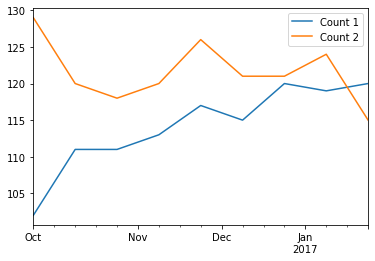

In [179]:
import matplotlib.pyplot as plt
%matplotlib inline

df.plot()